In [2]:
import numpy as np
from models.BKMeans import bkmeans
from models.cdist import cdist
from models.sammon import sammon
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [3]:
def make_unique(x : np.ndarray, y : np.ndarray):
    """
    :param x: The data points
    :type x: numpy.ndarray or array-like
    :param y: The output/classes accompanying the data in x
    :type y: numpy.ndarray or array-like
    :returns: The unique rows of x with the corresponding rows in y as (x_unique, y)
    """
    if type(x) != np.ndarray:
        x = np.array(x)
    if x.ndim > 2:
        raise ValueError("x must be a 2-dimensional or 1-dimensional array!")
    if type(y) != np.ndarray:
        y = np.array(y)
    newsize = np.unique(x, axis=0).shape[0]
    if newsize == x.shape[0]: # If x contains no duplicates, just return as-is
        return x, y
    x_unique = np.zeros((newsize, x.shape[1]))
    y_unique = np.zeros(newsize)
    q, zerorow = 0, np.zeros(x[0].shape)
    for r in range(x.shape[0]):
        row = x[r]
        # Check if row is a 0 vector
        if np.all(row == zerorow):
            if r == 0 or not np.any(np.all(x_unique[:q] == zerorow, axis=1)):
                y[q] = y[r]
                q = q+1
        elif not np.any(np.all(x_unique[:q] == row, axis=1)):
            x_unique[q], y_unique[q] = row, y[r]
            q = q+1
    if x_unique.shape[0] != np.unique(x_unique, axis=0).shape[0]:
        print(x_unique)
        raise ValueError("x still contains duplicates. Check code!")
    return x_unique, y_unique


In [4]:
def generate_reduced_dimensions(x1, x2, x3):
    xlist = [x1, x2, x3]
    # First generate PCA for all
    pcalist = []
    TSNElist = []
    sammonlist = []

    for x in xlist:
        if x.shape[0] != np.unique(x, axis=0).shape[0]:
            raise ValueError("Dataset contains duplicates!")
        pcalist.append(PCA(n_components=2).fit_transform(x))
        TSNElist.append(TSNE().fit_transform(StandardScaler().fit_transform(x)))
        sammonlist.append(sammon(StandardScaler().fit_transform(x), max_iter=500, epsilon=0.2, minsize=0.0001)[0])
    return {
        'PCA' : pcalist,
        'T-SNE' : TSNElist,
        'Sammon' : sammonlist
    }


In [5]:
df_park = pd.read_csv("../data/parkinsons.csv").dropna()
status_df_park = df_park['status']
df_park.drop('name', axis=1, inplace=True)
df_park.drop('status', axis=1, inplace=True)


In [6]:
df_glass = pd.read_csv('../data/glass.csv').dropna().drop('id', axis=1)
glass_type = df_glass['type']
df_glass.drop('type', axis=1, inplace=True)
print(df_glass)

          ri     na    mg    al     si     k    ca    ba   fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [7]:
df_yeast = pd.read_csv("../data/yeast.csv", delimiter="  ", engine="python").dropna().drop('seq_name', axis=1) # Using python engine to query with regex, even though it is slower performance.
yeast_class = df_yeast['class']
df_yeast.drop('class', axis=1, inplace=True)
print(df_yeast)

       mcg   gvh   alm   mit  erl  pox   vac   nuc
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
...    ...   ...   ...   ...  ...  ...   ...   ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22

[1484 rows x 8 columns]


In [8]:
X_park, y_park = StandardScaler().fit_transform(df_park.to_numpy()), status_df_park.to_numpy()
X_glass, y_glass = StandardScaler().fit_transform(df_glass.to_numpy()), glass_type.to_numpy()
X_yeast, y_yeast = StandardScaler().fit_transform(df_yeast.to_numpy()[:1000]), LabelEncoder().fit_transform(yeast_class.to_numpy()[:1000])

In [9]:
print(np.unique(y_yeast))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Making data unique so that sammon mapping doesn't break
X_park, y_park = make_unique(X_park, y_park)
X_glass, y_glass = make_unique(X_glass, y_glass)
X_yeast, y_yeast = make_unique(X_yeast, y_yeast)

In [11]:
mappingDict = generate_reduced_dimensions(X_park, X_glass, X_yeast)

c:\users\jacob skoog\unicourses\2dv516\2dv516-main\a4\sammon_mapping\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\jacob skoog\unicourses\2dv516\2dv516-main\a4\sammon_mapping\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\jacob skoog\unicourses\2dv516\2dv516-main\a4\sammon_mapping\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\jacob skoog\unicourses\2dv516\2dv516-main\a4\sammon_mapping\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\jacob skoog\unicourses\2dv516\2dv516-main\a4\sammon_mapping\v

In [12]:
y_dict = {}
maptypes = tuple(mappingDict.keys())
for typename in maptypes:
    y_dict[typename] = (y_park, y_glass, y_yeast)

(195, 2)
(213, 2)
(981, 2)
(195, 2)
(213, 2)
(981, 2)
(195, 2)
(213, 2)
(981, 2)


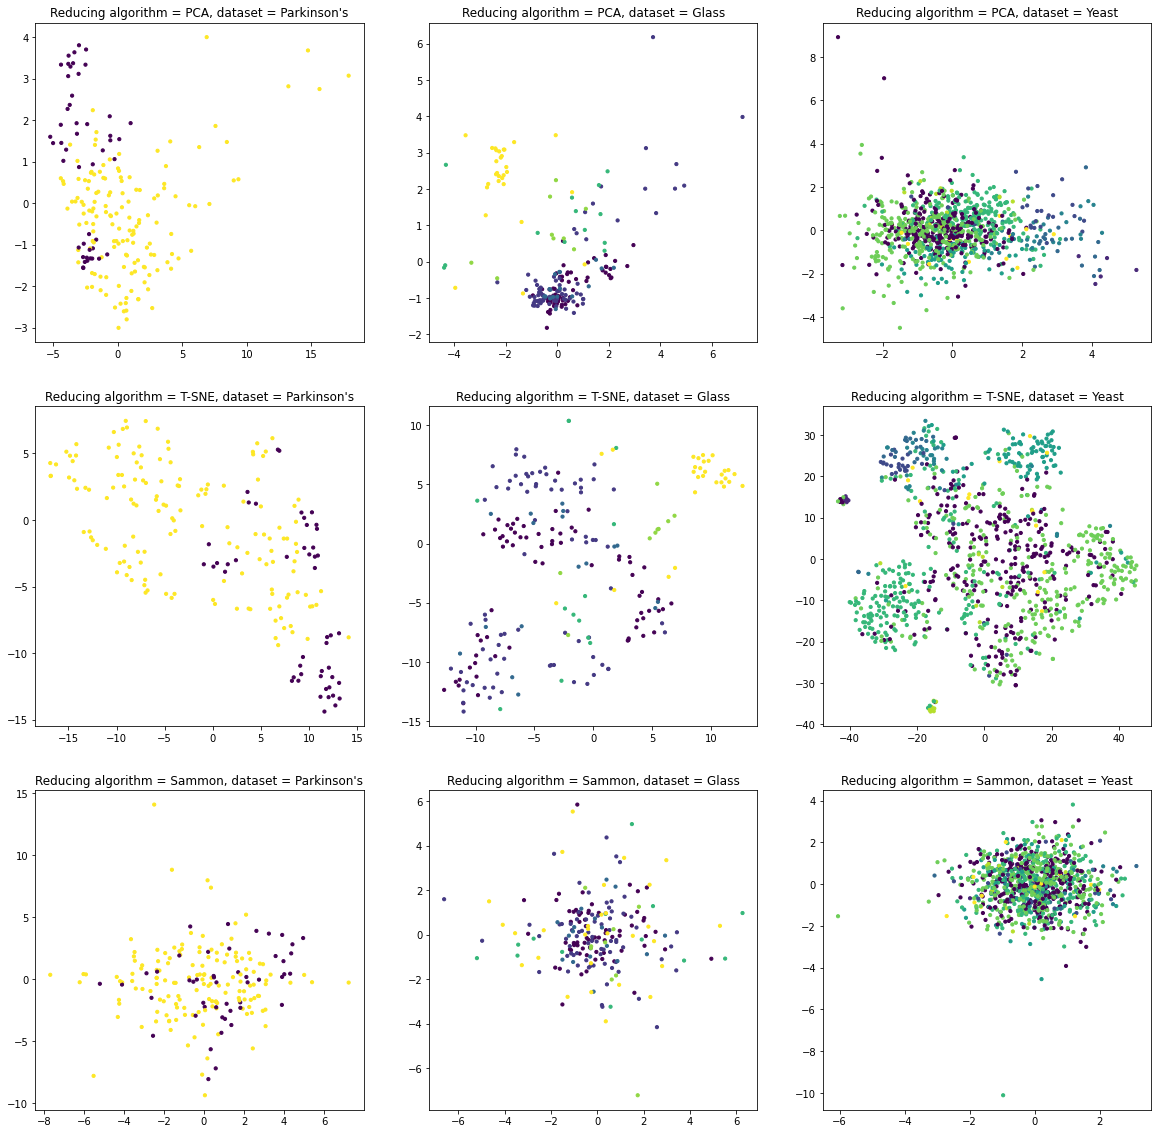

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
ar = 0
datasetnames = ["Parkinson's", "Glass", "Yeast"]
for maptype, mappings in mappingDict.items():
    axrow = axes[ar]
    for i, mapping in enumerate(mappings):
        print(mapping.shape)
        ax = axrow[i]
        ax.scatter(mapping[:, 0], mapping[:, 1], c=y_dict[maptype][i], s=10)
        ax.set_title(f'Reducing algorithm = {maptype}, dataset = {datasetnames[i]}')
    ar = ar+1


## Thoughts on methods for reducing dimensionality

To start with, it seems like the data sets that I have gathered are a bit too complex to be reduced to two dimensions.
Sammon mapping seems to struggle with all the datasets, leaving most of the data highly clustered. T-SNE was the only
algorithm that managed to separate each dataset into somewhat meaningful clusters for each dataset, although the yeast
dataset in particular was difficult to give meaningful separation for.

In [14]:
clusterDict = {
    "Bisecting K-Means" : [],
    "K-Means" : [],
    "Hierarchical" : []
}
n_clusters = [2, 6, 10]
for i, x in enumerate(mappingDict['Sammon']):
    clusterDict['Bisecting K-Means'].append([x, bkmeans(x, n_clusters[i], 10)])
    clusterDict['K-Means'].append([x, KMeans(n_clusters=n_clusters[i]).fit_predict(x)])
    clusterDict['Hierarchical'].append([x, AgglomerativeClustering(n_clusters=n_clusters[i]).fit_predict(x)])

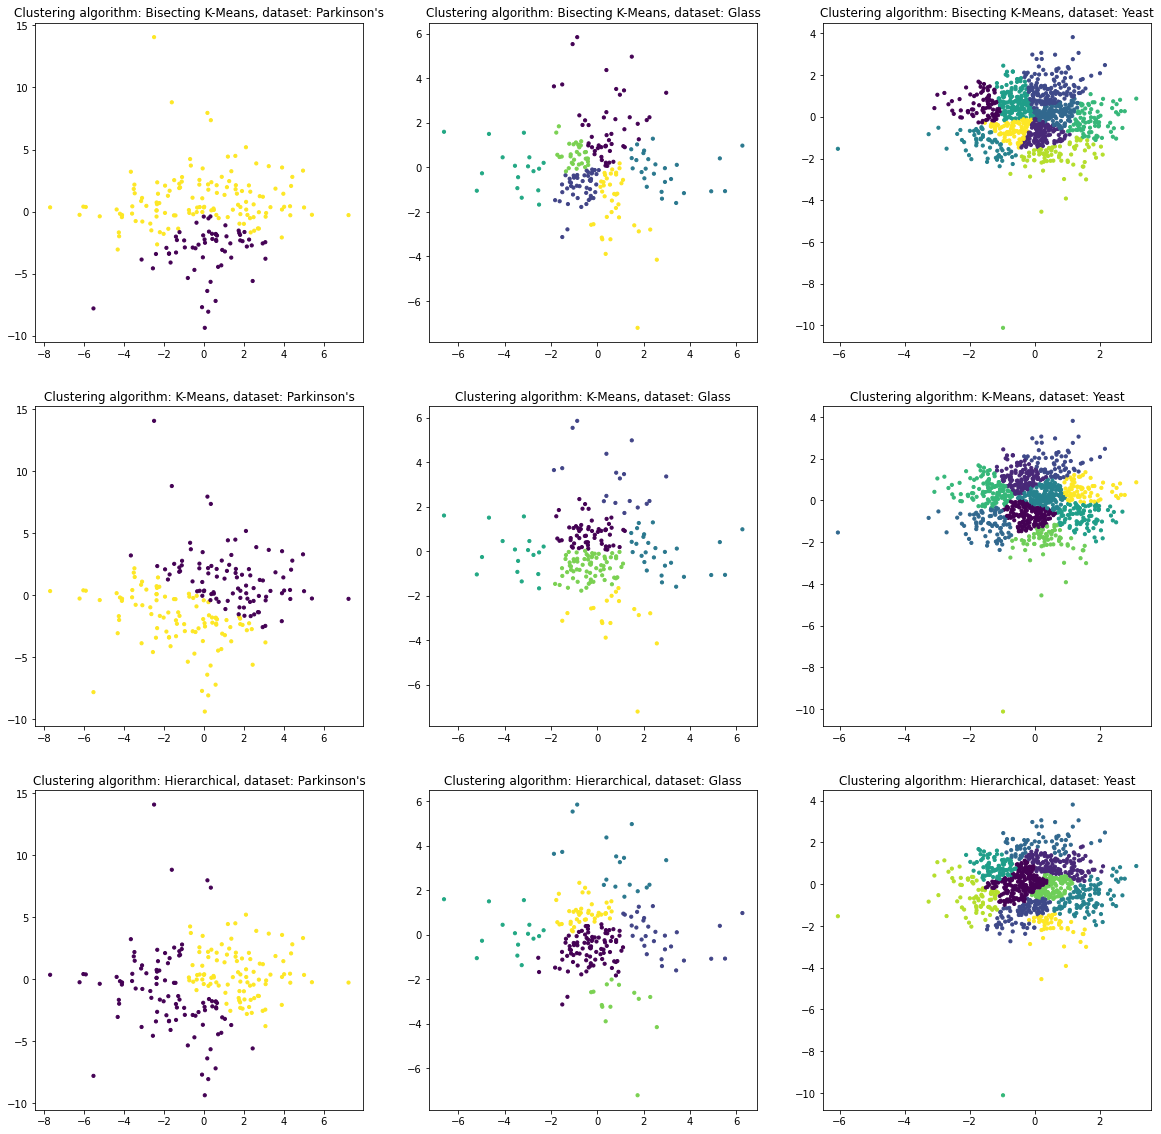

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
a = 0
for clusteralg, data_and_cluster_list in clusterDict.items():
    axrow = axes[a]
    for i, [x, cluster] in enumerate(data_and_cluster_list):
        ax = axrow[i]
        ax.scatter(x[:, 0], x[:, 1], c=cluster, s=10)
        ax.set_title(f'Clustering algorithm: {clusteralg}, dataset: {datasetnames[i]}')
    a = a+1

In [16]:
clusterDict2 = {
    "Bisecting K-Means" : [],
    "K-Means" : [],
    "Hierarchical" : []
}
n_clusters = [2, 6, 10]
for i, x in enumerate(mappingDict['Sammon']):
    clusterDict2['Bisecting K-Means'].append([x, bkmeans(x, n_clusters[i], 10)])
    clusterDict2['K-Means'].append([x, KMeans(n_clusters=n_clusters[i]).fit_predict(x)])
    clusterDict2['Hierarchical'].append([x, AgglomerativeClustering(n_clusters=n_clusters[i]).fit_predict(x)])

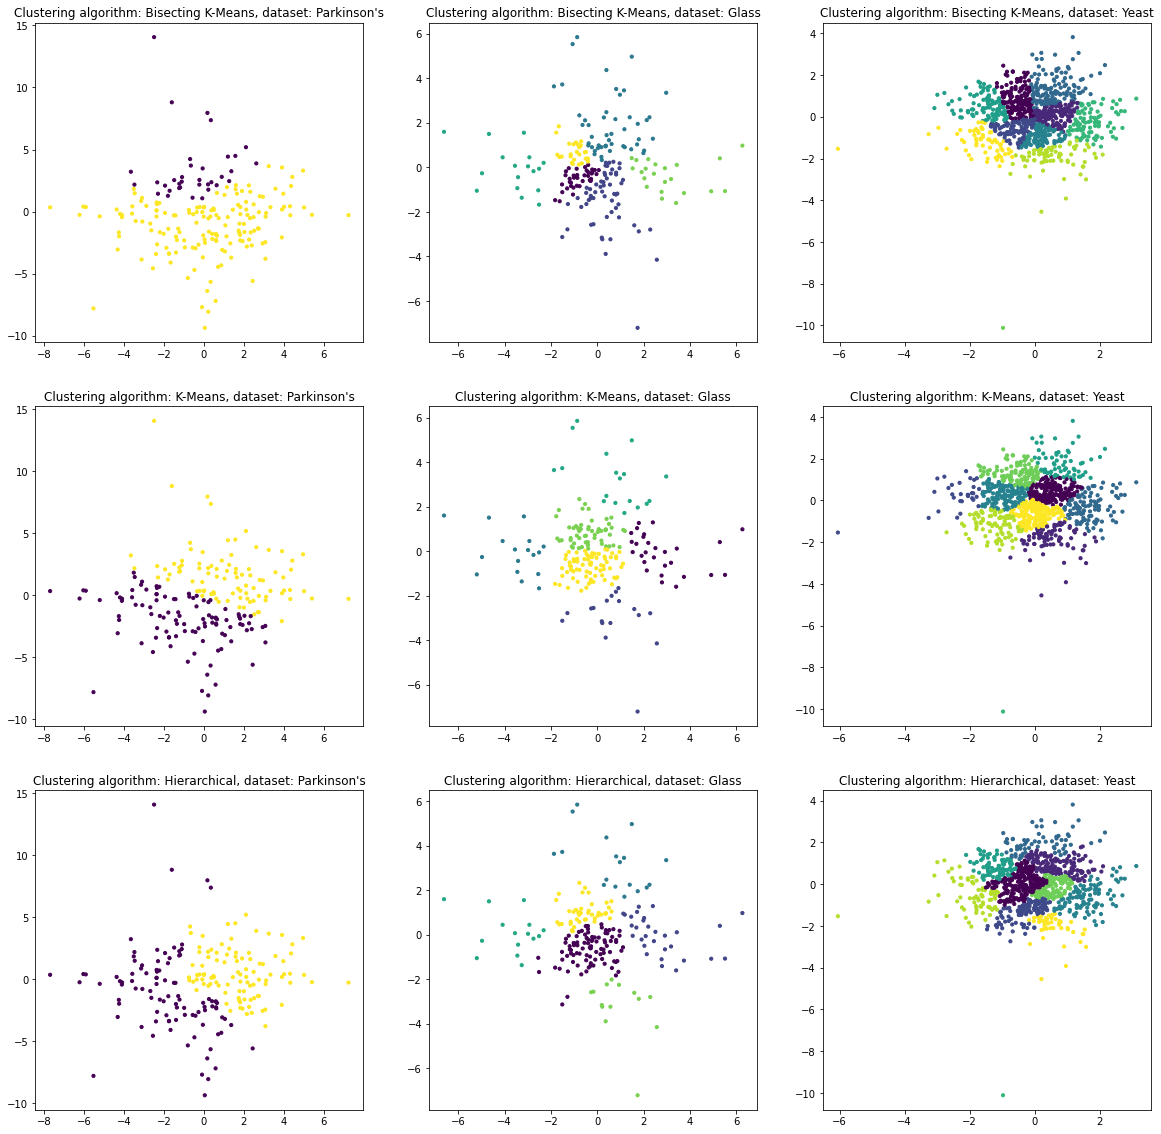

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
a = 0
for clusteralg, data_and_cluster_list in clusterDict2.items():
    axrow = axes[a]
    for i, [x, cluster] in enumerate(data_and_cluster_list):
        ax = axrow[i]
        ax.scatter(x[:, 0], x[:, 1], c=cluster, s=10)
        ax.set_title(f'Clustering algorithm: {clusteralg}, dataset: {datasetnames[i]}')
    a = a+1

## Clustering discussion

Looking at the result of the clustering methods, you can really tell how linear the KMeans methods are. This was
especially noticeable when looking at the yeast dataset that had been reduced with Sammon mapping. The hierarchical
clustering was able to draw some non-linear boundaries and was thus able to find clusters that look more meaningful,
while for bisecting K-Means and classical K-means the clustering divisions look a bit arbitrary.

Looking instead at how the clustering algorithms performed on the data that had been mapped with T-SNE, it looks like
each clustering method is having an easier time as the data is more separated and easier to cluster. But even here the
hierarchical clustering looks better.

However, no clustering method for either of the mapping methods gave any meaningful correlation between the clustering
and the original class of the data. This was not surprising as the data classes in many datasets seemed almost randomly
spread out across the feature space, at least after mapping had been performed.
